# PRACTICA GUIADA 2: Visualización con Seaborn

## Iris dataset

Este dataset contiene información sobre dimensión de pétalos y sépalos de tres especies de iris

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import datasets

In [2]:
# Leemos el dataset
iris_ds = datasets.load_iris()


In [3]:
iris_ds

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris = pd.DataFrame(iris_ds['data'], columns=iris_ds['feature_names'])

In [5]:
iris['species'] = iris_ds['target']

In [6]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [7]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


* Ploteamos las variables numéricas y sus relaciones
* Asignamos colores según las categorías de 'species' (hue = matiz)

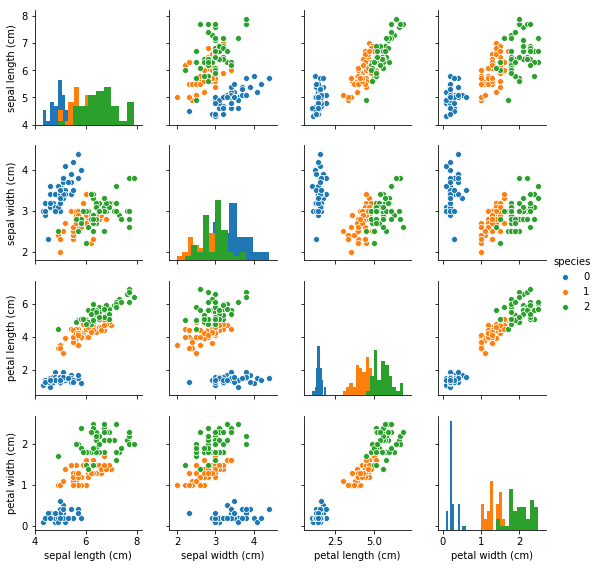

In [8]:
sns.pairplot(iris, vars=[c for c in iris.columns if c != 'species'], hue='species',\
             diag_kind='hist', height=2);

* Los histogramas anteriores sugieren ciertas superposiciones...
* Probemos con la función de densidad

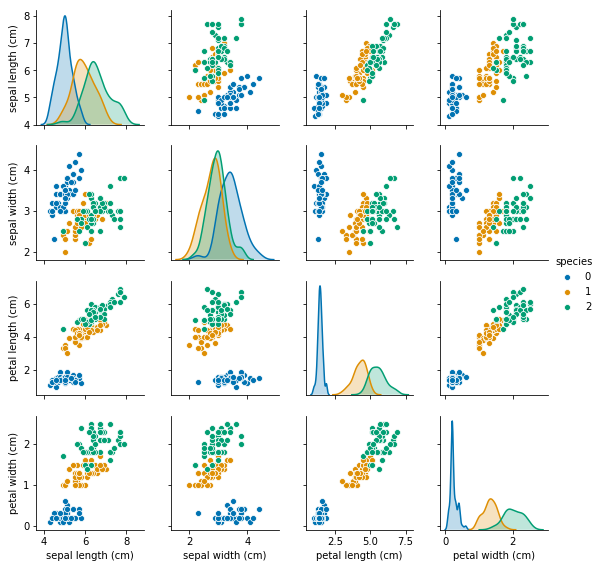

In [9]:
sns.pairplot(iris, vars=[c for c in iris.columns if c != 'species'], hue="species", 
             palette="colorblind", diag_kind="kde", height=2);

* Elegimos dos variables de interés
* Identificamos especies por color y forma del marcador

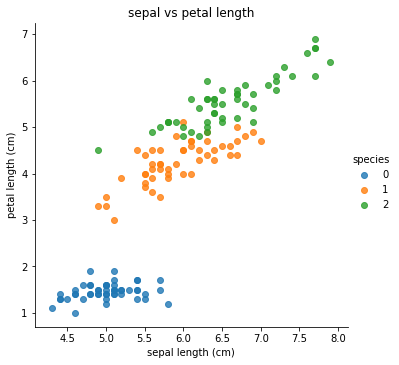

In [10]:
sns.lmplot(x="sepal length (cm)", y="petal length (cm)", data = iris,\
           hue = 'species', fit_reg=False)
plt.title('sepal vs petal length');

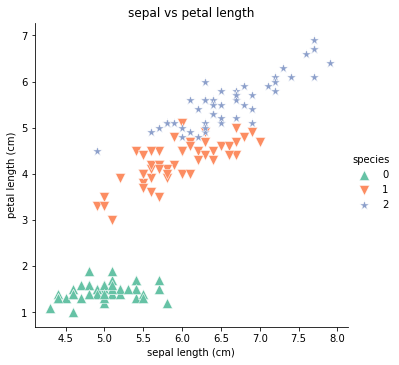

In [11]:
FG = sns.FacetGrid(iris, hue="species", palette="Set2", height=5, 
                   hue_kws={"marker": ["^", "v", "*"]})
FG.map(plt.scatter, "sepal length (cm)", "petal length (cm)", s=100, linewidth=.5,\
       edgecolor="white")
FG.add_legend()
plt.title('sepal vs petal length');

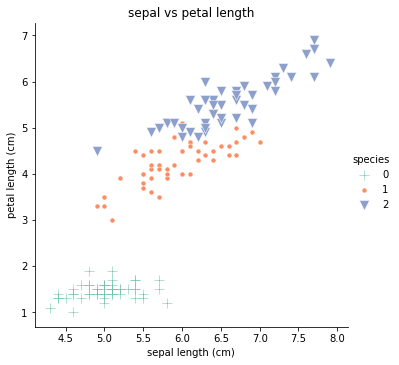

In [12]:
FG = sns.FacetGrid(iris, hue="species", palette="Set2", height=5, 
                   hue_kws={"marker": ["+", ".", "v"]})
FG.map(plt.scatter, "sepal length (cm)", "petal length (cm)", s=100, linewidth=.5,\
       edgecolor="white")
FG.add_legend()
plt.title('sepal vs petal length');

### Ejemplo con el Tips dataset

In [13]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
set(tips.time)

{'Dinner', 'Lunch'}

In [15]:
set(tips.smoker)

{'No', 'Yes'}

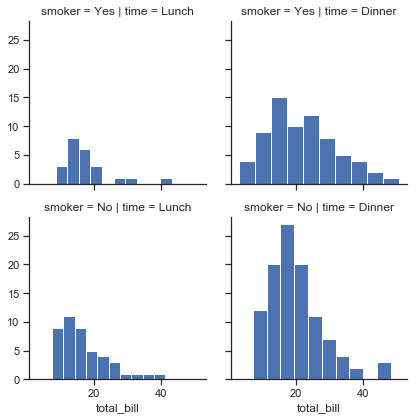

In [16]:
# La clase FacetGrid no permite crear un Multi-plot grid a partir de variables categóricas:

sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")

[Aquí](http://gree2.github.io/python/2015/05/05/python-seaborn-tutorial-controlling-figure-aesthetics) hay un tutorial de Seaborn para ajustar presentación de las visualizaciones.

[Aquí](http://seaborn.pydata.org/tutorial/color_palettes.html) pueden encontrar una descripción sobre paletas de color de Seaborn.